<a href="https://colab.research.google.com/github/Kushagratandon12/Introduction_to_tensorflow/blob/master/Tensorflow_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
print (tf.__version__)
mnist = tf.keras.datasets.mnist

2.2.0


In [0]:
(training_data , training_labels),(test_data,test_label) = mnist.load_data()

In [15]:
len(training_data[0])

28

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

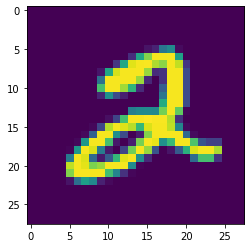

In [16]:
import matplotlib.pyplot as plt
plt.imshow(training_data[5])
print(training_data[5])

In [17]:
training_data = training_data/255
test_data=test_data/255
print(training_labels)

[5 0 4 ... 5 6 8]


In [0]:
model = tf.keras.models.Sequential([keras.layers.Flatten(),
                                    keras.layers.Dense(1024,activation=tf.nn.relu),
                                    keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])


In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True


#calling the class 
callbacks=myCallback()

In [24]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_data,training_labels,epochs=10,batch_size=10,callbacks=[callbacks])

Epoch 1/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0806 - accuracy: 0.9761
Epoch 2/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0551 - accuracy: 0.9829
Epoch 3/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0443 - accuracy: 0.9868
Epoch 4/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0385 - accuracy: 0.9885
Epoch 5/10
5997/6000 [============================>.] - ETA: 0s - loss: 0.0318 - accuracy: 0.9907
Reached 99% accuracy so cancelling training!
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0318 - accuracy: 0.9907


In [8]:
model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9794


[0.07080685347318649, 0.9793999791145325]